In [ ]:
# Importing relevant libraries
from Tanish_Jain import *
from Kanha_func import *
from Tianyi_Wang import *


In [2]:
from Bryce_Smith import *

In [2]:
df_full = pd.read_csv('Full_Dataset.csv')
df_toilets = pd.read_csv('public_restrooms_sf.csv')
df_complete = pd.read_csv('Complete_Geocoded_Homeless_Police_Reports.csv')

### Histogram of Instances of Homeless Presence along with locations of Public Restrooms

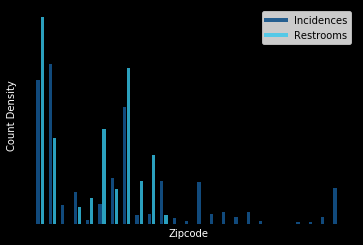

In [10]:
plothist_rest(df_full, df_toilets, False)

### Plot of Colorbar

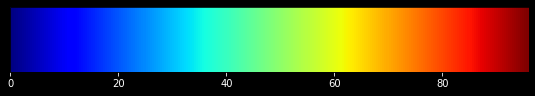

In [11]:
create_colorbar(df_toilets, False)

In [3]:
#Load the datasets
project_data = pd.read_csv('Full Dataset.csv')
toilet_data = pd.read_csv('public_restrooms_sf.csv')
crime_data = pd.read_csv('Police Dataset2.csv')

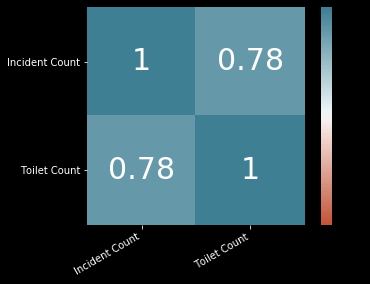

,Incident Count,Toilet Count
Incident Count,1.000000,0.784451
Toilet Count,0.784451,1.000000


In [4]:
homeless_reports = project_data.groupby('Zip')['Latitude'].count().to_frame()
toilet_data = toilet_data.groupby('zip')['location'].count().to_frame()

num_toilets = []

for zipcode in list(homeless_reports.index):   
    try:
        num_toilets.append(toilet_data.loc[int(zipcode)][0])
    except:
        num_toilets.append(0)

homeless_reports = homeless_reports.rename(columns={'Latitude':'Incident Count'})
homeless_reports.insert(len(homeless_reports.columns), "Toilet Count", num_toilets, True)

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(homeless_reports)

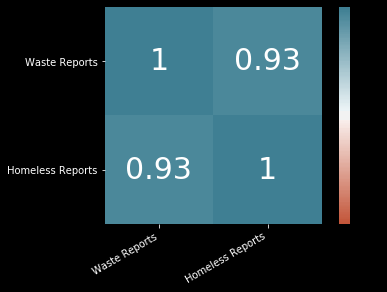

,Waste Reports,Homeless Reports
Waste Reports,1.000000,0.929544
Homeless Reports,0.929544,1.000000


In [5]:
other_reports = project_data[project_data['Description'] != 'Human or Animal Waste']
poop_reports = project_data[project_data['Description'] == 'Human or Animal Waste']

other_reports = other_reports.groupby('Zip').count()
poop_reports = poop_reports.groupby('Zip').count()
other_reports.insert(0, "Waste Reports", poop_reports.Category, True)
all_reports = other_reports[['Waste Reports','Date']]
all_reports = all_reports.rename(columns={'Date':'Homeless Reports'})

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(all_reports)

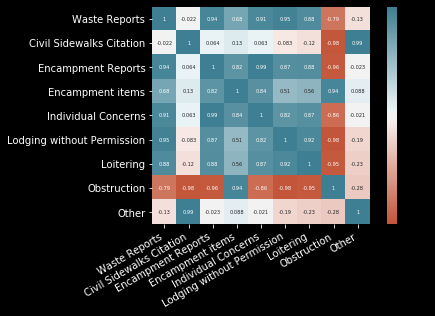

,Waste Reports,Civil Sidewalks Citation,Encampment Reports,Encampment items,Individual Concerns,Lodging without Permission,Loitering,Obstruction,Other
Waste Reports,1.000000,-0.021745,0.938997,0.683600,0.914961,0.954582,0.883722,-0.793113,-0.129268
Civil Sidewalks Citation,-0.021745,1.000000,0.064375,0.131843,0.063041,-0.083266,-0.119350,-0.981981,0.989645
Encampment Reports,0.938997,0.064375,1.000000,0.821712,0.987321,0.873492,0.881671,-0.956575,-0.023242
Encampment items,0.683600,0.131843,0.821712,1.000000,0.844088,0.510245,0.557467,0.939695,0.087548
Individual Concerns,0.914961,0.063041,0.987321,0.844088,1.000000,0.823473,0.866086,-0.857325,-0.021034
Lodging without Permission,0.954582,-0.083266,0.873492,0.510245,0.823473,1.000000,0.915426,-0.984403,-0.192743
Loitering,0.883722,-0.119350,0.881671,0.557467,0.866086,0.915426,1.000000,-0.953821,-0.232875
Obstruction,-0.793113,-0.981981,-0.956575,0.939695,-0.857325,-0.984403,-0.953821,1.000000,-0.277350
Other,-0.129268,0.989645,-0.023242,0.087548,-0.021034,-0.192743,-0.232875,-0.277350,1.000000


In [6]:
#Split the dataset by the category of report (variable) (occurence by zip code)
cat0 = project_data[project_data['Description'] == 'Human or Animal Waste'].groupby('Zip').count()
cat1 = project_data[project_data['Description'] == 'CIVIL SIDEWALKS, CITATION'].groupby('Zip').count()
cat2 = project_data[project_data['Description'] == 'Encampment Reports'].groupby('Zip').count()
cat3 = project_data[project_data['Description'] == 'Encampment items'].groupby('Zip').count()
cat4 = project_data[project_data['Description'] == 'Individual Concerns'].groupby('Zip').count()
cat5 = project_data[project_data['Description'] == 'LODGING WITHOUT PERMISSION'].groupby('Zip').count()
cat6 = project_data[project_data['Description'] == 'Loitering'].groupby('Zip').count()
cat7 = project_data[project_data['Description'] == 'OBSTRUCTING HEALTH FACILITY, PLACE OF WORSHIP, OR SCHOOL'].groupby('Zip').count()
cat8 = project_data[project_data['Description'] == 'Other'].groupby('Zip').count()

#Create dataset with each variable (occurence by zip code)
cat8.insert(0, 'Waste Reports', cat0.Category, True)
cat8.insert(0, 'Civil Sidewalks Citation', cat1.Category, True)
cat8.insert(0, 'Encampment Reports', cat2.Category, True)
cat8.insert(0, 'Encampment items', cat3.Category, True)
cat8.insert(0, 'Individual Concerns', cat4.Category, True)
cat8.insert(0, 'Lodging without Permission', cat5.Category, True)
cat8.insert(0, 'Loitering', cat6.Category, True)
cat8.insert(0, 'Obstruction', cat7.Category, True)
cat8 = cat8.rename(columns={'Category':'Other'})
all_reports = cat8[['Waste Reports','Civil Sidewalks Citation','Encampment Reports','Encampment items','Individual Concerns','Lodging without Permission','Loitering','Obstruction','Other']]

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(all_reports, 5)


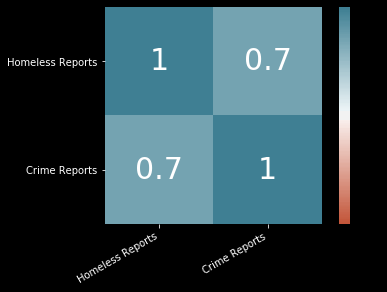

,Homeless Reports,Crime Reports
Homeless Reports,1.000000,0.697208
Crime Reports,0.697208,1.000000


In [7]:
crime_reports = crime_data.groupby('Zip').count()
homeless_reports = project_data.groupby('Zip').count()
crime_reports = crime_reports.rename(columns={'Category':'Crime Reports'})
crime_reports.insert(0, 'Homeless Reports', homeless_reports.Category, True)
crime_reports = crime_reports[['Homeless Reports','Crime Reports']]

#Create correlation matrix for each variable (occurence by zip code)
create_corr_mat(crime_reports)


<class 'matplotlib.container.BarContainer'>


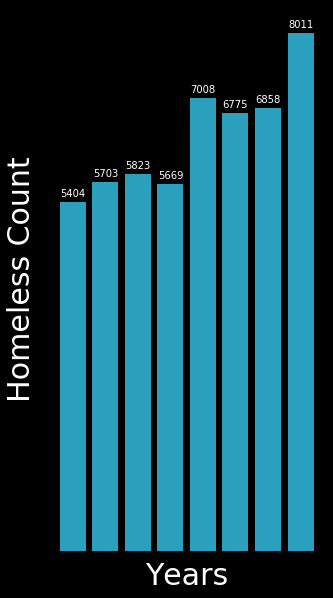

In [28]:
#Data
years = range(2005,2020,2)
population = [5404, 5703, 5823, 5669, 7008, 6775, 6858, 8011]

x = np.arange(len(years))   #labels for x axis
width = 0.8                 #width of the bars
fig, ax = plt.subplots(facecolor='black', figsize=(5,10))
rects1 = ax.bar(x - width / 2, population, width, color='#37C9EF', alpha=.8)
print(type(rects1))
ax.set_ylabel('Homeless Count', size=30)
ax.set_xlabel('Years', size=30)
ax.set_xticks(x)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', labelcolor='white')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_facecolor('black')

autolabel(rects1, ax)

## Heatmap part

In [2]:
fname = 'Complete Dataset.csv'
data = pd.read_csv(fname)

In [3]:
heatmap_drawer(fname, 'Y', 'W')

2008 Human or Animal Waste map done!
2009 Human or Animal Waste map done!
2010 Human or Animal Waste map done!
2011 Human or Animal Waste map done!
2012 Human or Animal Waste map done!
2013 Human or Animal Waste map done!
2014 Human or Animal Waste map done!
2015 Human or Animal Waste map done!
2016 Human or Animal Waste map done!
2017 Human or Animal Waste map done!
2018 Human or Animal Waste map done!
2019 Human or Animal Waste map done!


![SegmentLocal](./year_waste.gif)

In [6]:
heatmap_drawer(fname, 'Y', 'E')

2008 Encampment Reports map done!
2009 Encampment Reports map done!
2010 Encampment Reports map done!
2011 Encampment Reports map done!
2012 Encampment Reports map done!
2013 Encampment Reports map done!
2014 Encampment Reports map done!
2015 Encampment Reports map done!
2016 Encampment Reports map done!
2017 Encampment Reports map done!
2018 Encampment Reports map done!
2019 Encampment Reports map done!


![SegmentLocal](./year_encampment.gif)

In [7]:
heatmap_drawer(fname, 'M', 'E')

1 Encampment Reports map done!
2 Encampment Reports map done!
3 Encampment Reports map done!
4 Encampment Reports map done!
5 Encampment Reports map done!
6 Encampment Reports map done!
7 Encampment Reports map done!
8 Encampment Reports map done!
9 Encampment Reports map done!
10 Encampment Reports map done!
11 Encampment Reports map done!
12 Encampment Reports map done!


![SegmentLocal](./month_encampment.gif)

In [9]:
heatmap_drawer(fname, 'M', 'W')

1 Human or Animal Waste map done!
2 Human or Animal Waste map done!
3 Human or Animal Waste map done!
4 Human or Animal Waste map done!
5 Human or Animal Waste map done!
6 Human or Animal Waste map done!
7 Human or Animal Waste map done!
8 Human or Animal Waste map done!
9 Human or Animal Waste map done!
10 Human or Animal Waste map done!
11 Human or Animal Waste map done!
12 Human or Animal Waste map done!


![SegmentLocal](./month_waste.gif)

In [ ]:
###################################### Load Files ####################################################
# file 1
homeless_data_cleaner("Police_Department_Incident_Reports__2018_to_Present.csv",
                      ['Incident Date', 'Incident Description','Incident Subcategory', 'point'],
                      ['Lodging Without Permission', 'Civil Sidewalks, Citation', 'Civil Sidewalks, Warning'
                          ,'Loitering', 'Obstructing Health Facility, Place of Worship, or School',
                       'Civil Sidewalks, Violation', 'Lodging in Park', 'Civil Sidewalks, Booking'],
                      keep_other_data=True)

# file 2
# columns in this file are uppercase:
colum = ['Lodging Without Permission', 'Civil Sidewalks, Citation', 'Civil Sidewalks, Warning'
                          ,'Loitering', 'Obstructing Health Facility, Place of Worship, or School',
                       'Civil Sidewalks, Violation', 'Lodging in Park', 'Civil Sidewalks, Booking']
for i in range(len(colum)): colum[i] = colum[i].upper()
homeless_data_cleaner("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv",
                      ['Date', 'Category', 'Descript', 'Location'], colum,
                      keep_other_data=True)

# file 3
homeless_data_cleaner('311_Cases.csv', ['Opened','Category', 'Request Type', 'Point'],
                      ['Encampments', 'Human or Animal Waste', 'Homeless Concerns'])

In [ ]:
############################ Add Latitude Longitude and Zipcodes ################################################
add zip codes, latitude, and longitude
add_ll('Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv')
add_ll('Cleaned_Not_Homeless_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
add_ll('Cleaned_311_Cases.csv')

In [ ]:
######################################## Files to Combine #########################################################
# combine all files in the list
all_homeless_filenames = ['Geocoded_Cleaned_311_Cases.csv',
                          'Geocoded_Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv',
                          'Geocoded_Cleaned_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv']
not_homeless_police_reports = ['Geocoded_Cleaned_Not_Homeless_Police_Department_Incident_Reports__2018_to_Present.csv',
                          'Geocoded_Cleaned_Not_Homeless_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv']
homeless_police_reports = ['Geocoded_Cleaned_Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv',
                           'Geocoded_Cleaned_Police_Department_Incident_Reports__2018_to_Present.csv']

file_combiner(homeless_police_reports, 'Complete_Geocoded_Homeless_Police_Reports.csv')
file_combiner(not_homeless_police_reports, 'Complete_Geocoded_Non_homeless_Police_reports.csv')
file_combiner(all_homeless_filenames, 'Complete_Geocoded_Homeless_Related_Data.csv')

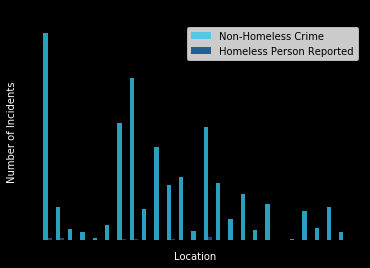

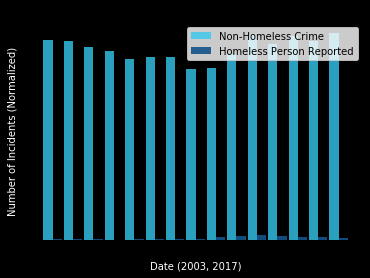

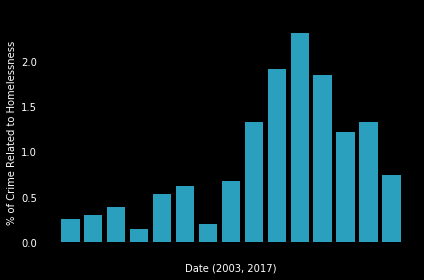

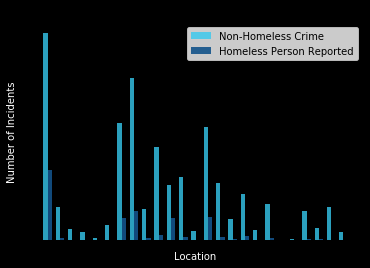

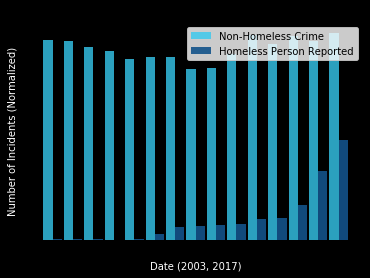

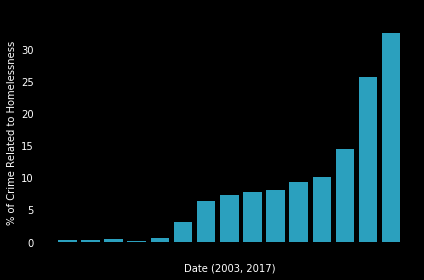

In [4]:
######################## Function Caller ########################################
# Get the % of all crime that is homeless related
bar_plot(['Complete_Geocoded_Non_homeless_Police_reports.csv',
           'Complete_Geocoded_Homeless_Police_Reports.csv'], ['Date', 'Zip'])

# Get the side by side bar graphs of Homeless reports
bar_plot(['Complete_Geocoded_Non_homeless_Police_reports.csv',
              'Complete_Geocoded_Homeless_Related_Data.csv'], ['Date', 'Zip'])